In [59]:
import numpy as np
import matplotlib.pyplot as plt

In [60]:
def derivative(f, x, h=1e-5):
    return (f(x + h) - f(x - h)) / (2 * h)

In [61]:
def objective(x):
    return (x - 3)**2 - 3*x - 10

In [62]:
# Método de la secante para minimización
def secant_method(f, x0, x1, tol=1e-6, max_iter=100):
    # Para almacenar el progreso de las iteraciones
    iter_values = [x0, x1]
    
    # Inicialización
    for k in range(max_iter):
        # Derivadas en los puntos actuales
        f_prime_x0 = derivative(f, x0)
        f_prime_x1 = derivative(f, x1)
        
        # Calcular la próxima iteración usando la fórmula de la secante
        x2 = x1 - (x1 - x0) * f_prime_x1 / (f_prime_x1 - f_prime_x0)
        
        # Guardar el nuevo valor en la lista de iteraciones
        iter_values.append(x2)
        
        # Verificar si la diferencia entre iteraciones es menor que la tolerancia
        if abs(x2 - x1) < tol:
            print(f'Converged after {k+1} iterations')
            return x2, iter_values
        
        # Actualizar los puntos para la siguiente iteración
        x0, x1 = x1, x2

    # Si el método no converge
    print('Max iterations reached without convergence')
    return x2, iter_values

Converged after 2 iterations
Minimizer: 4.5000000000222045


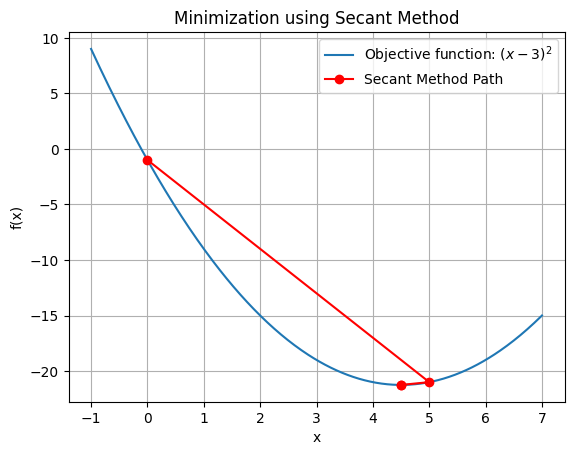

In [63]:
# Puntos iniciales
x0 = 0
x1 = 5

# Ejecutar el método de la secante
minimizer, iter_values = secant_method(objective, x0, x1)

# Mostrar el minimizador encontrado
print(f'Minimizer: {minimizer}')

# Crear la gráfica del proceso de minimización
x = np.linspace(-1, 7, 400)  # Rango de valores de x
y = objective(x)  # Evaluación de la función objetivo

# Gráfica de la función objetivo
plt.plot(x, y, label="Objective function: $(x-3)^2$")
plt.xlabel('x')
plt.ylabel('f(x)')

# Añadir las iteraciones en la gráfica
iter_values = np.array(iter_values)
plt.plot(iter_values, objective(iter_values), 'o-', color='red', label="Secant Method Path")

# Añadir leyenda y mostrar la gráfica
plt.legend()
plt.title("Minimization using Secant Method")
plt.grid(True)
plt.show()